In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam

In [211]:
# Import data
df_previous = pd.read_csv('Resources/season_stats_2122_2324.csv')
df_current = pd.read_csv('Resources/season_stats_2425.csv')

In [213]:
# Create Points Per Game Metric
df_previous['PPG'] = df_previous['Points'] / df_previous['GP']

In [215]:
# Preview data for data from 2021/2022 through 2023/2024 season
df_previous

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,SCSF,SCSA,SCSF%,SCGF,SCGA,SCGF%,SCSH%,SCSV%,HDCF,HDCA,HDCF%,HDSF,HDSA,HDSF%,HDGF,HDGA,HDGF%,HDSH%,HDSV%,MDCF,MDCA,MDCF%,MDSF,MDSA,MDSF%,MDGF,MDGA,MDGF%,MDSH%,MDSV%,LDCF,LDCA,LDCF%,LDSF,LDSA,LDSF%,LDGF,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO,PPG
0,1,Anaheim Ducks,246,14939.2667,81,134,31,73,193,0.392,12964,15767,45.12,9666,11992,44.63,6915,8596,44.58,637,894,41.61,645.62,862.32,42.81,6200,8013,43.62,3592,4780,42.90,507,702,41.94,14.11,85.31,2554,3467,42.42,1826,2482,42.39,331,449,42.44,18.13,81.91,3646,4546,44.51,1766,2298,43.45,176,253,41.03,9.97,88.99,6378,7775,45.06,2797,3453,44.75,117,174,40.21,4.18,94.96,9.21,89.60,0.988,0.784553
1,2,Arizona Coyotes,246,14925.2833,89,131,26,83,204,0.415,12509,15479,44.69,9301,11760,44.16,6517,8377,43.76,685,877,43.85,646.72,833.58,43.69,6257,7920,44.13,3599,4594,43.93,553,706,43.92,15.37,84.63,2543,3281,43.66,1764,2281,43.61,336,426,44.09,19.05,81.32,3714,4639,44.46,1835,2313,44.24,217,280,43.66,11.83,87.89,6098,7594,44.54,2620,3405,43.49,120,151,44.28,4.58,95.57,10.51,89.53,1.000,0.829268
2,3,Boston Bruins,246,14945.0500,163,58,25,153,351,0.713,14340,13936,50.71,10932,10355,51.36,8063,7308,52.46,817,613,57.13,771.87,688.52,52.85,7448,6826,52.18,4523,3790,54.41,670,502,57.17,14.81,86.75,3071,2728,52.96,2269,1926,54.09,418,331,55.81,18.42,82.81,4377,4098,51.65,2254,1864,54.74,252,171,59.57,11.18,90.83,6810,7023,49.23,3131,3089,50.34,133,95,58.33,4.25,96.92,10.13,91.61,1.017,1.426829
3,4,Buffalo Sabres,246,14909.6167,113,109,24,105,250,0.508,13941,13972,49.94,10501,10854,49.17,7654,7816,49.48,766,827,48.09,716.30,783.47,47.76,6839,7199,48.72,4041,4335,48.24,599,676,46.98,14.82,84.41,2685,3183,45.76,1899,2276,45.49,333,423,44.05,17.54,81.41,4154,4016,50.84,2142,2059,50.99,266,253,51.25,12.42,87.71,6966,6793,50.63,3241,3129,50.88,144,133,51.99,4.44,95.75,10.01,89.42,0.994,1.016260
4,5,Carolina Hurricanes,246,14932.6000,158,64,24,151,340,0.691,16544,11815,58.34,12357,9101,57.59,8385,6544,56.17,816,621,56.78,858.91,659.09,56.58,7880,5898,57.19,4337,3606,54.60,668,528,55.85,15.40,85.36,3419,2702,55.86,2270,1943,53.88,431,339,55.97,18.99,82.55,4461,3196,58.26,2067,1663,55.42,237,189,55.63,11.47,88.63,8513,5593,60.35,3711,2494,59.81,128,78,62.14,3.45,96.87,9.73,90.51,1.002,1.382114
5,6,Columbus Blue Jackets,246,14917.5500,89,129,28,81,206,0.419,14150,15853,47.16,10395,11914,46.60,7322,8618,45.93,705,924,43.28,697.77,841.89,45.32,6729,7933,45.89,3808,4645,45.05,565,742,43.23,14.84,84.03,2578,3281,44.00,1797,2340,43.44,338,455,42.62,18.81,80.56,4151,4652,47.15,2011,2305,46.59,227,287,44.16,11.29,87.55,7089,7785,47.66,3083,3594,46.17,124,164,43.06,4.02,95.44,9.63,89.28,0.989,0.837398
6,7,Calgary Flames,246,14927.0500,126,87,33,122,285,0.579,16012,13435,54.38,11908,9976,54.41,8431,7056,54.44,802,720,52.69,821.94,699.31,54.03,7765,6788,53.36,4504,3931,53.40,644,591,52.15,14.30,84.97,3082,2693,53.37,2185,1908,53.38,406,336,54.72,18.58,82.39,4683,4095,53.35,2319,2023,53.41,238,255,48.28,10.26,87.39,7974,6556,54.88,3440,2715,55.89,137,107,56.15,3.98,96.06,9.51,89.80,0.993,1.158537
7,8,Chicago Blackhawks,246,14913.6833,77,144,25,68,179,0.364,12598,15254,45.23,9241,11216,45.17,6725,8144,45.23,593,877,40.34,622.63,784.93,44.23,6036,7710,43.91,3571,4446,44.54,504,695,42.04,14.11,84.37,2379,3087,43.52,1700,2187,43.74,324,446,42.08,19.06,79.61,3657,4623,44.17,1871,2259,45.30,180,249,41.96,9.62,88.98,6324,7411,46.04,2827,3345,45.80,83,153,35.17,2.94,95.43,8.82,89.23,0.980,0.727642
8,9,Colorado Avalanche,246,14933.7833,157,68,21,145,335,0.681,15496,13930,52.66,11320,10423,52.06,8310,7613,52.19,884,707,55.56,780.54,727.31,51.77,7693,6618,53.76,4503,3957,53.23,694,564,55.17,15.41,85.75,3043,3004,50.32,2167,2159,50.09,429,386,52.64,19.80,82.12,4650,3614,56.27,2336,1798,56.51,265,178,59.82,11.34,90.10,7669,7044,52.12,3428,3236,51.44,163,121,57.39,4.75,96.26,10.64,90.71,1.014,1.361789
9,10,Dallas Stars,246,14

In [217]:
# Create Points Per Game Metric
df_current['PPG'] = df_current['Points'] / df_current['GP']

In [219]:
# Preview data for data for the 2024/2025 season (current season)
df_current

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,SCSF,SCSA,SCSF%,SCGF,SCGA,SCGF%,SCSH%,SCSV%,HDCF,HDCA,HDCF%,HDSF,HDSA,HDSF%,HDGF,HDGA,HDGF%,HDSH%,HDSV%,MDCF,MDCA,MDCF%,MDSF,MDSA,MDSF%,MDGF,MDGA,MDGF%,MDSH%,MDSV%,LDCF,LDCA,LDCF%,LDSF,LDSA,LDSF%,LDGF,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO,PPG
0,1,Anaheim Ducks,39,2372.0833,17,18,4,15,38,0.487,2297,2649,46.44,1661,1898,46.67,1099,1243,46.93,99,117,45.83,114.16,142.07,44.55,1040,1290,44.64,567,661,46.17,75,98,43.35,13.23,85.17,414,559,42.55,277,356,43.76,49,65,42.98,17.69,81.74,626,731,46.13,290,305,48.74,26,33,44.07,8.97,89.18,1315,1591,45.25,462,522,46.95,20,15,57.14,4.33,97.13,9.01,90.59,0.996,0.974359
1,2,Boston Bruins,42,2549.8833,20,17,5,20,45,0.536,2421,2377,50.46,1732,1706,50.38,1172,1134,50.82,111,131,45.87,128.86,113.87,53.09,1161,1090,51.58,598,567,51.33,92,110,45.54,15.38,80.60,484,428,53.07,317,271,53.91,57,63,47.50,17.98,76.75,677,662,50.56,281,296,48.70,35,47,42.68,12.46,84.12,1444,1439,50.09,493,498,49.75,17,17,50.00,3.45,96.59,9.47,88.45,0.979,1.071429
2,3,Buffalo Sabres,40,2425.9500,14,21,5,13,33,0.413,2381,2370,50.12,1691,1723,49.53,1080,1164,48.13,121,136,47.08,112.26,128.06,46.71,1067,1168,47.74,522,637,45.04,99,114,46.48,18.97,82.10,428,464,47.98,247,293,45.74,61,68,47.29,24.70,76.79,639,704,47.58,275,344,44.43,38,46,45.24,13.82,86.63,1464,1448,50.27,495,467,51.46,18,17,51.43,3.64,96.36,11.20,88.32,0.995,0.825000
3,4,Carolina Hurricanes,40,2417.1667,24,14,2,24,50,0.625,2789,1950,58.85,2023,1454,58.18,1274,1002,55.98,135,112,54.66,140.23,116.12,54.70,1290,986,56.68,653,578,53.05,101,84,54.59,15.47,85.47,503,455,52.51,317,320,49.76,65,51,56.03,20.50,84.06,787,531,59.71,336,258,56.57,36,33,52.17,10.71,87.21,1754,1127,60.88,574,363,61.26,31,25,55.36,5.40,93.11,10.60,88.82,0.994,1.250000
4,5,Columbus Blue Jackets,40,2424.6833,17,17,6,15,40,0.500,2409,2440,49.68,1722,1745,49.67,1207,1167,50.84,135,145,48.21,120.01,123.46,49.29,1076,1137,48.62,606,606,50.00,106,112,48.62,17.49,81.52,441,500,46.87,300,329,47.69,58,69,45.67,19.33,79.03,635,637,49.92,306,277,52.49,48,43,52.75,15.69,84.48,1442,1474,49.45,511,508,50.15,24,31,43.64,4.70,93.90,11.18,87.57,0.988,1.000000
5,6,Calgary Flames,39,2378.4167,18,14,7,15,43,0.551,2480,2321,51.66,1721,1640,51.20,1149,1141,50.17,102,119,46.15,115.13,115.75,49.86,1117,1124,49.84,582,597,49.36,79,97,44.89,13.57,83.75,433,436,49.83,276,291,48.68,42,61,40.78,15.22,79.04,684,688,49.85,306,306,50.00,37,36,50.68,12.09,88.24,1505,1441,51.09,498,480,50.92,19,20,48.72,3.82,95.83,8.88,89.57,0.984,1.102564
6,7,Chicago Blackhawks,40,2408.5667,13,25,2,12,28,0.350,2033,2481,45.04,1471,1786,45.16,1022,1207,45.85,101,137,42.44,101.79,131.02,43.72,941,1170,44.58,517,625,45.27,79,108,42.25,15.28,82.72,387,494,43.93,252,327,43.52,45,70,39.13,17.86,78.59,554,676,45.04,265,298,47.07,34,38,47.22,12.83,87.25,1217,1509,44.64,455,512,47.05,20,24,45.45,4.40,95.31,9.88,88.65,0.985,0.700000
7,8,Colorado Avalanche,40,2417.9000,24,15,1,23,49,0.613,2496,2233,52.78,1738,1571,52.52,1177,1066,52.47,136,129,51.32,125.29,117.68,51.57,1209,1006,54.58,634,542,53.91,97,95,50.52,15.30,82.47,452,439,50.73,310,288,51.84,57,69,45.24,18.39,76.04,757,567,57.18,324,254,56.06,40,26,60.61,12.35,89.76,1439,1372,51.19,472,455,50.92,29,26,52.73,6.14,94.29,11.55,87.90,0.995,1.225000
8,9,Dallas Stars,38,2291.1167,24,13,1,23,49,0.645,2424,2034,54.37,1707,1492,53.36,1171,996,54.04,122,95,56.22,133.02,105.70,55.72,1191,982,54.81,640,505,55.90,99,80,55.31,15.47,84.16,500,412,54.82,341,252,57.50,60,46,56.60,17.60,81.75,691,570,54.80,299,253,54.17,39,34,53.42,13.04,86.56,1440,1222,54.09,464,421,52.43,19,14,57.58,4.09,96.67,10.42,90.46,1.009,1.289474
9,10,Detroit Red Wings,39,2357.4000,17,18,4,16,38,0.487,2140,2411,47.02,1497,1741,46.23,986,1146,46.25,106,126,45.69,108.43,118.59,47.76,1026,1093,48.42,551,553,49.91,88,87,50.29,15.97,84.27,379,418,47.55,236,260,47.58,41,50,45.05,17.37,80.77,647,675,48.94,315,293,51.81,47,37,55.95,1

In [484]:
# Prepare features and target variable
# Initial attempt at features
features = ['CF%', 'FF%', 'SF%', 'GF%', 'xGF%', 'SCF%', 'SCSF%', 'SCGF%', 'HDCF%', 'HDSF%', 'HDGF%', 'SH%', 'SV%']
# Second attempt at features after removing low impact features
features_2 = ['SF%', 'GF%', 'SCF%', 'SCSF%', 'SCGF%', 'HDSF%', 'HDGF%', 'SV%']
target = 'PPG'

X = df_previous[features_2]
y = df_previous[target]



In [486]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [488]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit Random Forest (RF) Model

In [491]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [493]:
# Make predictions on test set
y_pred = rf_model.predict(X_test_scaled)

## Evaluate RF Model

In [496]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.023021261466259015
Mean Squared Error: 0.0007142326306294624
R-squared Score: 0.9773626777840114


## Apply RF Model to Current Season

In [499]:
# Prepare current season data
X_current = df_current[features_2]
X_current_scaled = scaler.transform(X_current)

In [501]:
# Predict points for current season
current_predictions_rf = rf_model.predict(X_current_scaled)

In [503]:
# Adjust predictions for 82-game schedule
games_played = df_current['GP']
current_points = df_current['Points']
remaining_games = 82 - games_played
current_ppg = current_points / games_played
projected_points = current_points + (current_ppg * remaining_games)

In [505]:
# Add predictions to current season dataframe
df_current['RF_Predicted_PPG'] = current_predictions
df_current['RF_Predicted_Points'] = (current_predictions *82).round().astype(int)

In [507]:
# Create results dataframe
results = pd.DataFrame({
    'Team': df_current['Team'],
    'Current Points': current_points,
    'Games Played': games_played,
    'Current Pace': projected_points.round(0),
    'RF Model Prediction': df_current['RF_Predicted_Points']
})

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap to multiple lines
pd.set_option('display.max_rows', None)     # Show all rows

# Sort by model predictions
results = results.sort_values('RF Model Prediction', ascending=False)
print("\nFull Season Point Predictions:")
print(results.to_string(index=True, justify='left'))


Full Season Point Predictions:
   Team                    Current Points  Games Played  Current Pace  RF Model Prediction
30          Winnipeg Jets  56              41            112.0         112                
31    Washington Capitals  55              39            116.0         111                
29   Vegas Golden Knights  57              39            120.0         111                
25    Tampa Bay Lightning  42              37             93.0         110                
15      New Jersey Devils  51              42            100.0         109                
8            Dallas Stars  49              38            106.0         109                
12      Los Angeles Kings  51              38            110.0         105                
26    Toronto Maple Leafs  54              41            108.0         105                
3     Carolina Hurricanes  50              40            102.0          98                
13         Minnesota Wild  54              40            1

## Feature Importance

In [398]:
# Use sklearn to calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2926740142203483, 'SV%'),
 (0.2856318020928908, 'GF%'),
 (0.24288190259816309, 'SCGF%'),
 (0.049009657420045066, 'SCSF%'),
 (0.04121721317532977, 'SCF%'),
 (0.04119299162997729, 'HDGF%'),
 (0.027650536476789514, 'SF%'),
 (0.01974188238645611, 'HDSF%')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

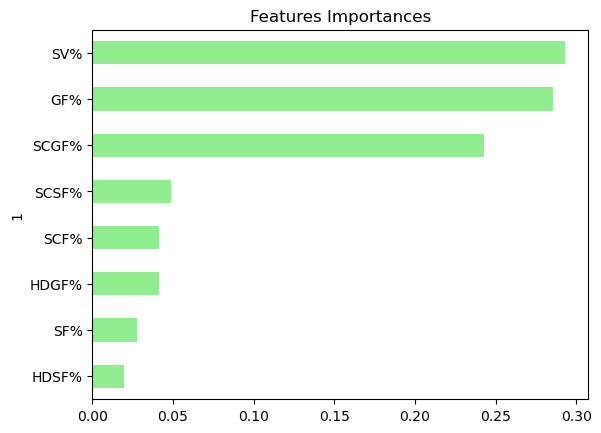

In [400]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## NHL Stats Glossary

**SV%** - Percentage of Shots against that team that were not Goals. 100-(GA*100/SA)<br>
**GF%** - Percentage of total Goals in games that team played that are for that team. GF*100/(GF+GA)<br>
**SCGF%** - Percentage of total Goals off of scoring chances in games that team played that are for that team. SCGF*100/(SCGF+SCGA)<br>
**HDGF%** - Percentage of total Goals off of High Danger Scoring Chances in games that team played that are for that team. HDGF*100/(HDGF+HDGA)<br>
**SCSF%** - Percentage of total Shots that are scoring chances in games that team played that are for that team. SCSF*100/(SCSF+SCSA)<br>
**SF%** - Percentage of total Shots in games that team played that are for that team. SF*100/(SF+SA)<br>
**HDSF%** - Percentage of total Shots that are High Danger Scoring Chances in games that team played that are for that team. HDSF*100/(HDSF+HDSA)<br>
**SCF%** - Percentage of total Scoring Chances in games that team played that are for that team. SCF*100/(SCF+SCA)<br>
**SH%** - Percentage of Shots for that team that were Goals. GF*100/SF<br>
**HDCF%** - Percentage of total High Danger Scoring Chances in games that team played that are for that team. HDCF*100/(HDCF+HDCA)<br>
**CF%** - Percentage of total Corsi in games that team played that are for that team. CF*100/(CF+CA)<br>
**xGF%** - Percentage of total Goals in games that team played that are for that team. GF*100/(GF+GA)<br>
**FF%** - Percentage of total Fenwick in games that team played that are for that team. FF*100/(FF+FA)

## Fit Linear Regression (LR) Model

In [533]:
# Prepare features and target variable
# First set of featured tried
lr_features = ['CF%', 'FF%', 'SF%', 'GF%', 'xGF%', 'SCF%', 'SCSF%', 'SCGF%', 'HDCF%', 'HDSF%', 'HDGF%', 'SH%', 'SV%']
# Second set of featured tried after removing low coefficient features
lr_features_2 = ['CF%', 'FF%', 'GF%', 'SCF%', 'SCSF%', 'SCGF%', 'SH%', 'SV%']
lr_target = 'PPG'

X = df_previous[lr_features_2]
y = df_previous[lr_target]

In [535]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [537]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [539]:
# Create a model with scikit-learn
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [541]:
# Make predictions using the X set
y_pred_lr = lr_model.predict(X_test_scaled)

## Evaluate LR Model

In [544]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.028863232698905388
Mean Squared Error: 0.0010387968186538158
R-squared Score: 0.9670757435429888


## Apply LR Model to Current Season

In [547]:
# Prepare current season data
X_current = df_current[lr_features_2]
X_current_scaled = scaler.transform(X_current)

In [549]:
# Predict points for current season
current_predictions_lr = lr_model.predict(X_current_scaled)

In [551]:
# Add predictions to current season dataframe
df_current['LR_Predicted_PPG'] = current_predictions_lr
df_current['LR_Predicted_Points'] = (current_predictions_lr *82).round().astype(int)

In [553]:
# Create results dataframe
results = pd.DataFrame({
    'Team': df_current['Team'],
    'Current Points': current_points,
    'Games Played': games_played,
    'Current Pace': projected_points.round(0),
    'RF Model Prediction': df_current['RF_Predicted_Points'],
    'LR Model Prediction': df_current['LR_Predicted_Points']
    
})

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap to multiple lines
pd.set_option('display.max_rows', None)     # Show all rows

# Sort by model predictions
results = results.sort_values('LR Model Prediction', ascending=False)
print("\nFull Season Point Predictions:")
print(results.to_string(index=True, justify='left'))


Full Season Point Predictions:
   Team                    Current Points  Games Played  Current Pace  RF Model Prediction  LR Model Prediction
30          Winnipeg Jets  56              41            112.0         112                  121                
29   Vegas Golden Knights  57              39            120.0         111                  121                
31    Washington Capitals  55              39            116.0         111                  118                
12      Los Angeles Kings  51              38            110.0         105                  112                
15      New Jersey Devils  51              42            100.0         109                  111                
25    Tampa Bay Lightning  42              37             93.0         110                  110                
3     Carolina Hurricanes  50              40            102.0          98                  108                
13         Minnesota Wild  54              40            111.0          

## LR Feature Importance

In [337]:
# Use sklearn to calculate feature importance
importances = lr_model.coef_
# We can sort the features by their importance
sorted(zip(lr_model.coef_, X.columns), reverse=True)

[(0.3859761114445677, 'GF%'),
 (0.14253250318562294, 'SCF%'),
 (0.07265804592875112, 'SCGF%'),
 (0.03400781749376841, 'FF%'),
 (-0.08028245424066976, 'SH%'),
 (-0.08923207316370103, 'SV%'),
 (-0.16464344046157187, 'SCSF%'),
 (-0.18823024809535646, 'CF%')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

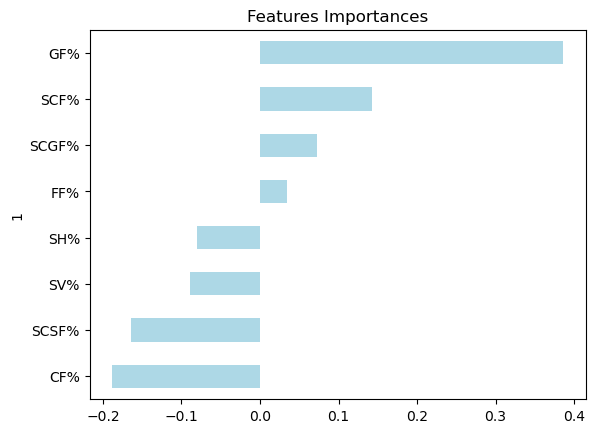

In [339]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(lr_model.coef_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Features Importances', legend=False)